# Pryngles Tutorials: In depth

This is a tutorial to [pryngles](https://github.com/seap-udea/pryngles).

Here we explore in depth some of the features of the package, especially those related to the creation of a Planetary System.

> **Notes**: 
> - This tutorial works properly for 0.4.x <= versions <=0.6.x
> - We use here the `Camel` interface to `Pryngles`. The interface will be promptly upgraded.

In this tutorial we explore in depth some of the features of the package.

## Install the package

Before running `Pryngles` you must be sure to install the latest version:

In [ ]:
!python -m pip install -U pryngles

This tutorial can be ran in different environments and accordingly you may set different variables to adjust to the environment you're using:

In [91]:
COLAB = 'google.colab' in str(get_ipython())
import matplotlib.pyplot as plt
if COLAB:
  %matplotlib inline
  RESOLUTION = 150
else:
  %matplotlib nbagg
  RESOLUTION = 100
plt.rcParams['figure.dpi'] = RESOLUTION

## Loading the package

The first thing you need to do is to load the package.  The `load_ext` and `autoreload` magics are useful if you update the package and want to 

In [119]:
%load_ext autoreload
%autoreload 2
import pryngles as pr
from pryngles._init import Consts

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Creating a planetary system

In order to create a planetary system you need first to create an object implementing all the required functionalities of the packages:

In [161]:
sys=pr.System()

The system is at first empty (no star, no planets, no rings).  This command simply create a container.  It will be always useful to know what the object contains:

In [162]:
sys.__dict__

{'rebound': False,
 '_sim': <rebound.simulation.Simulation object at 0x7ff06a3848c0, N=0, t=0.0>,
 'units': ['au', 'msun', 'yr'],
 '_ul': 'au',
 '_um': 'msun',
 '_ut': 'yr',
 'ul': 149597870700.0,
 'um': 1.9884754159665356e+30,
 'ut': 31557600.0,
 'hashes': {},
 'stars': [],
 'planets': [],
 'rings': [],
 'observers': [],
 'Stars': 0,
 'Planets': 0,
 'Rings': 0,
 'Observers': 0,
 'nstars': 0,
 'nplanets': 0,
 'nrings': 0,
 'nobservers': 0,
 'nbodies': 0}

Here, you may change the units by instantiating the object as:

```python 
    sys=pr.System(['km','mearth','day'])
```

Now we have a system we may add a star:

In [163]:
S=sys.add(kind="Star")

The default properties of the star may be checked in its properties `orbit`, `physics` and `optics`:

In [164]:
print(f"Orbital properties: {S.orbit}")
print(f"Physical properties: {S.physics}")
print(f"Optical properties: {S.optics}")

Orbital properties: {'m': 1}
Physical properties: {'radius': 1, 'prot': 1, 'wrot': 6.283185307179586}
Optical properties: {'limb_coeffs': [], 'nspangles': 1000}


As you may verify the star is assummed to have a set of default values.  Please recall that all quantities are in the units chosen when the system was defined.  If you want to change the properties, use:

In [165]:
S.update_body(physics=dict(radius=Consts.rsun/sys.ul,prot=25*Consts.day/sys.ut))

In [166]:
print(S.physics)

{'radius': 0.004650467260962157, 'prot': 0.06844626967830253, 'wrot': 91.79733733789377}


Now add a planet:

In [167]:
P=sys.add(kind="Planet",
          primary=S,
          orbit=dict(m=Consts.mearth/sys.um),
          physics=dict(radius=Consts.rearth/sys.ul,prot=24*Consts.hr/sys.ut))

In [168]:
print(f"Orbital properties: {P.orbit}")
print(f"Physical properties: {P.physics}")
print(f"Optical properties: {P.optics}")

Orbital properties: {'m': 3.0034896149157645e-06, 'a': 1.0, 'e': 0.0}
Physical properties: {'radius': 4.26352124542639e-05, 'prot': 0.0027378507871321013, 'wrot': 2294.9334334473438}
Optical properties: {'nspangles': 1000}


Now add a ring around the planet:

In [169]:
R=sys.add(kind="Ring",
          primary=P,
          physics=dict(fi=1.5,fe=2.5,i=30*Consts.deg)
         )
print(f"Orbital properties: {R.orbit}")
print(f"Physical properties: {R.physics}")
print(f"Optical properties: {R.optics}")

Orbital properties: {}
Physical properties: {'fi': 1.5, 'fe': 2.5, 'i': 0.5235987755982988, 'ri': 6.395281868139586e-05, 're': 0.00010658803113565974}
Optical properties: {'nspangles': 1000}


Finally you need an observer:

In [170]:
O=sys.add(kind="Observer")
print(f"Orbital properties: {O.orbit}")
print(f"Physical properties: {O.physics}")
print(f"Optical properties: {O.optics}")

Orbital properties: {}
Physical properties: {}
Optical properties: {'distance': 1, 'beta': 0, 'lamb': 0, 'inclination': 1.5707963267948966}


In [171]:
RP=sys.ensamble_system()

Let's check one the attributes of the `RingedPlanet` object:

In [172]:
RP.__dict__["physics"]

{'AS': 1,
 'AL': 1,
 'taug': 1.0,
 'diffeff': 1.0,
 'reflection_rings_law': <function pryngles._base.ensamble_system.<locals>.<lambda>(x, y)>,
 'wavelength': 5.5e-07,
 'particles': {'q': 3,
  's0': 0.0001,
  'smin': 0.01,
  'smax': 100.0,
  'Qsc': 1,
  'Qext': 2},
 'limb_cs': []}

Let's see the planet:

<IPython.core.display.Javascript object>


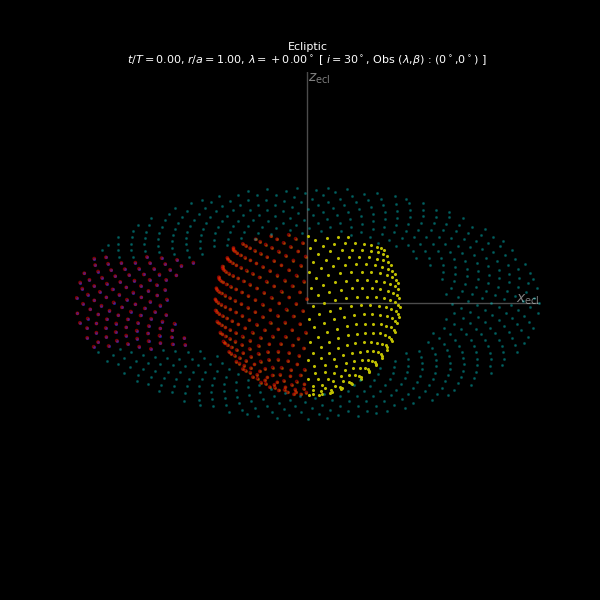

<IPython.core.display.Javascript object>


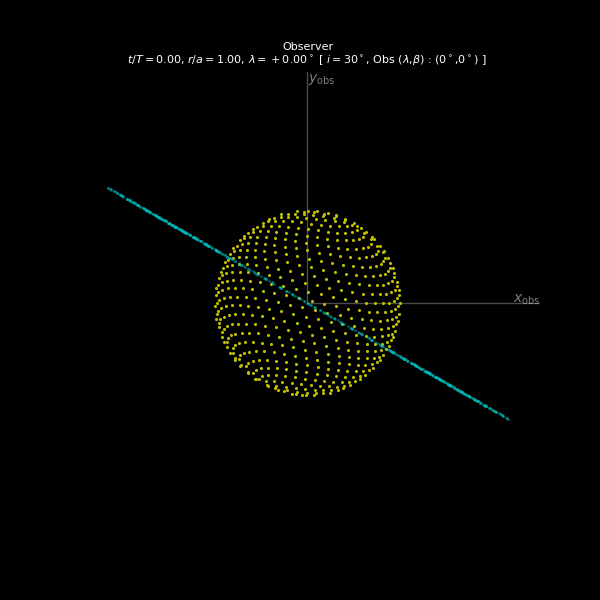

<IPython.core.display.Javascript object>


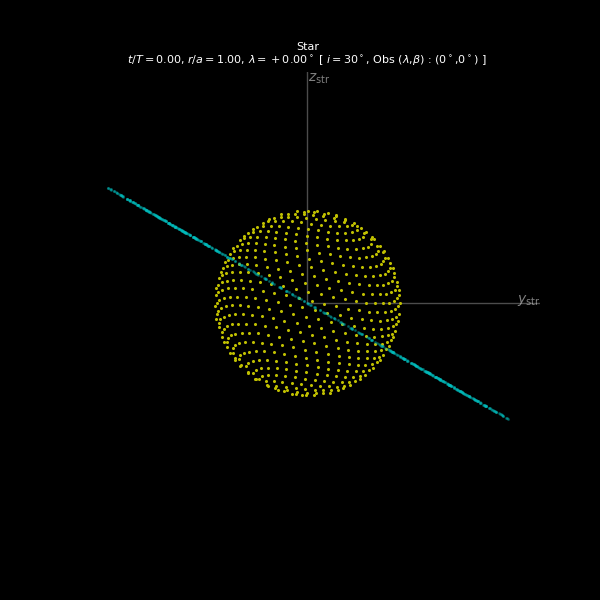

(<Figure size 600x600 with 1 Axes>,
 <Figure size 600x600 with 1 Axes>,
 <Figure size 600x600 with 1 Axes>)

In [175]:
RP.plotRingedPlanet()

--- 
*The authors*, Last update: may 1, 2022.